In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("/Users/daniellancet/Desktop/nltk_install/Data/US_NPO_EDUC.csv")
df = df.query("year == 2019")


In [48]:
# for state in df["state"].value_counts().index:
#     state_df = df[df["state"] == state]
#     sns.histplot(state_df["ruleyear"], bins = range(1900, 2026))
#     plt.title(state + " Rule Year Dist")
#     plt.show()



In [49]:
ruleyear = df.query("ruleyear > 2000.0")["ruleyear"]



<Axes: xlabel='state', ylabel='count'>

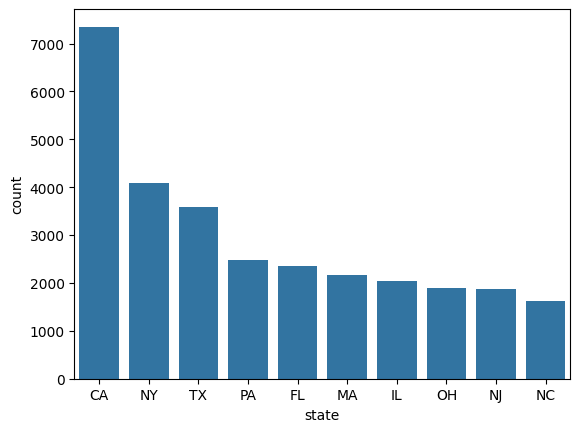

In [50]:
sns.barplot(df["state"].value_counts().head(10))

Explanation for 2020, 2021 rule years

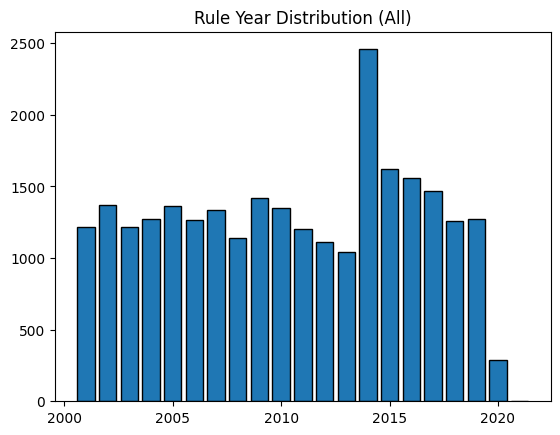

In [51]:

plt.bar(x = ruleyear.value_counts().sort_index().index, height=ruleyear.value_counts().sort_index().values, edgecolor = 'black');
plt.title("Rule Year Distribution (All)");

In [52]:
rule_diff = ruleyear.value_counts().sort_index().diff().dropna()
rule_diff.value_counts().sort_values()

count
-146.00    1
92.00      1
-95.00     1
67.00      1
-196.00    1
285.00     1
-70.00     1
-155.00    1
55.00      1
-286.00    1
1414.00    1
-836.00    1
-62.00     1
-212.00    1
20.00      1
-988.00    1
150.00     1
-71.00     1
-92.00     2
Name: count, dtype: int64

In [53]:
ruleyear_1943 = df.query("ruleyear == 1943")
ruleyear_1967 = df.query("ruleyear == 1967")
ruleyear_2014 = df.query("ruleyear == 2014")

In [54]:
ruleyear_2014 = ruleyear_2014.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

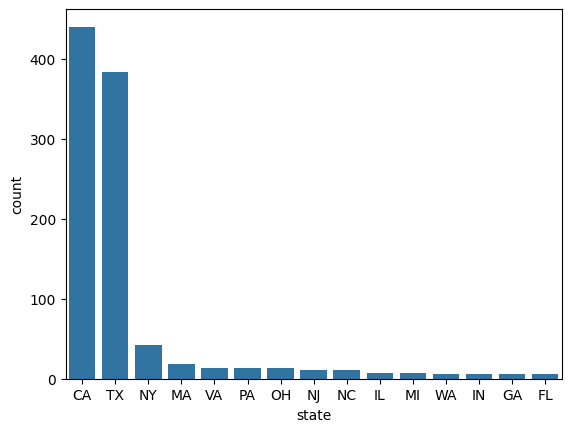

In [55]:
sns.barplot(ruleyear_1967["state"].value_counts().head(15));


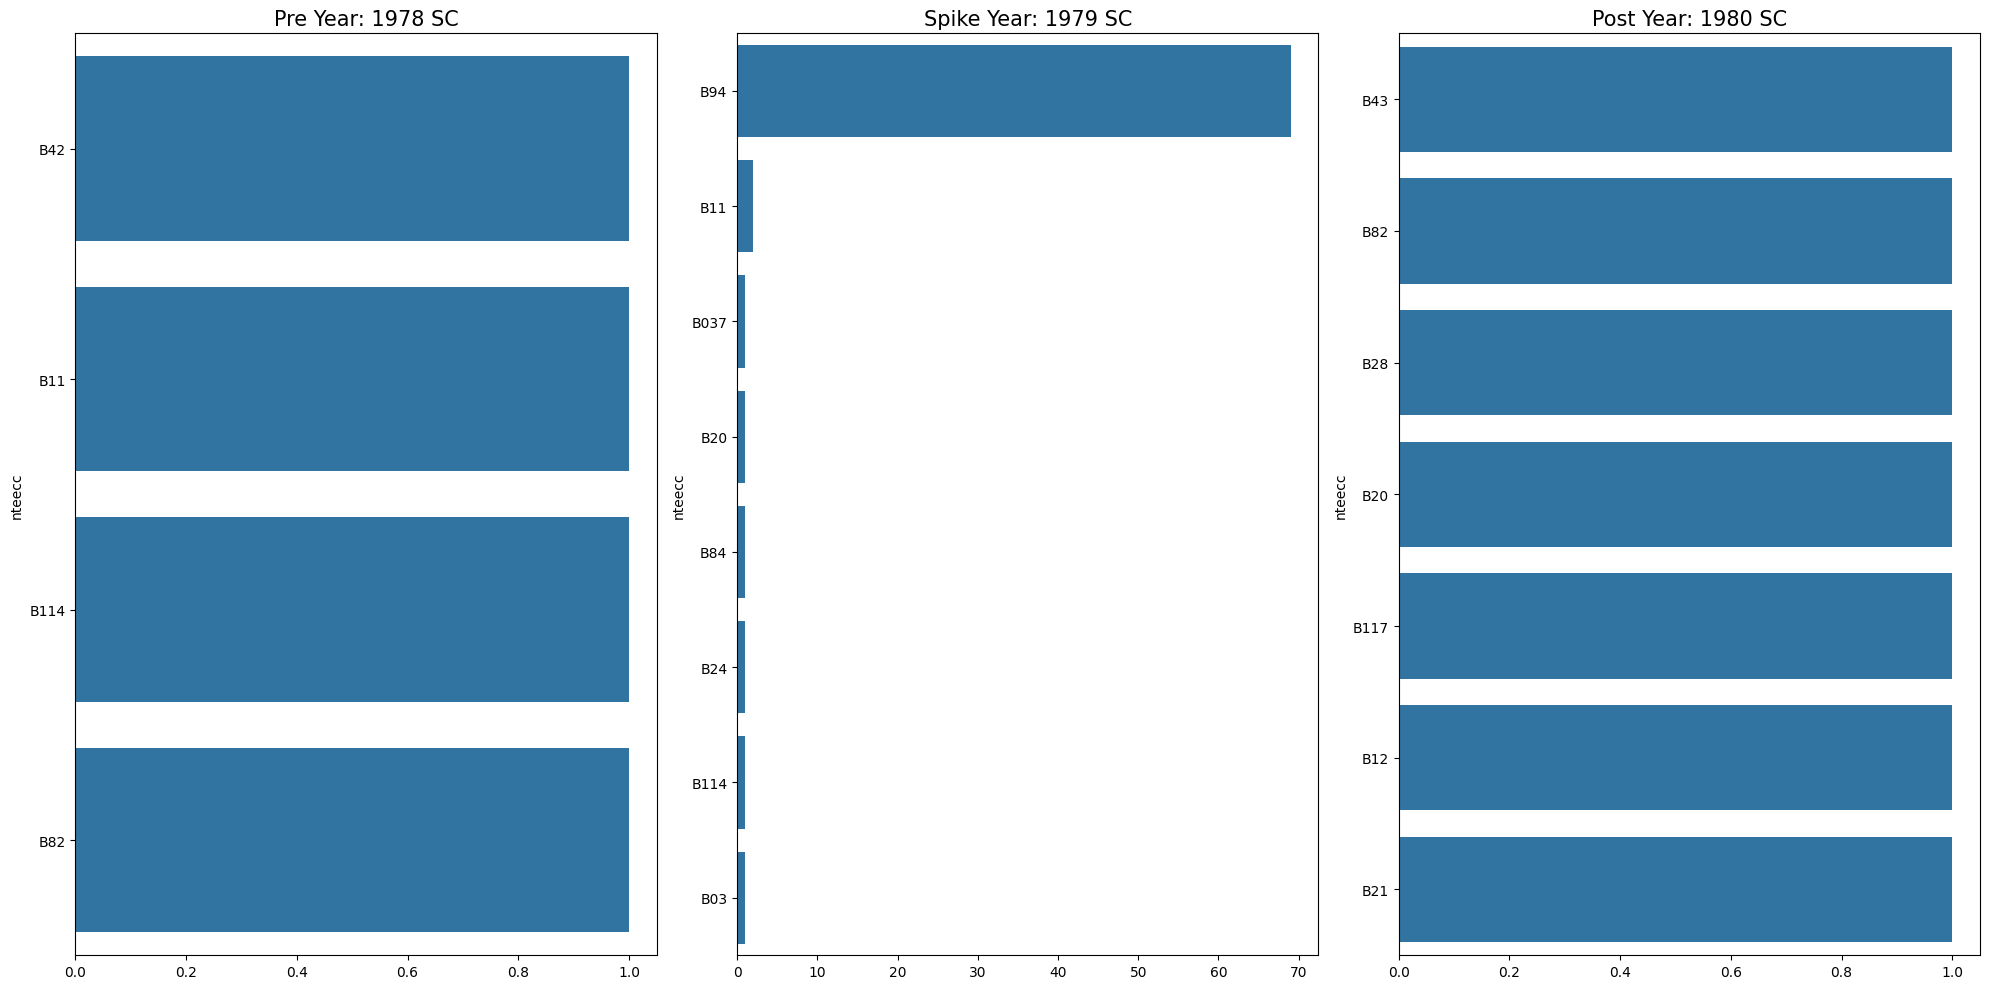

In [56]:


# def pre_post_spike(df, year, column, state=None):
#     spike = df[df['ruleyear'] == year][column].value_counts()
#     pre = df[df['year'] == year - 1][column].value_counts()
#     post = df[df['year'] == year + 1][column].value_counts()
    
#     fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    
#     sns.barplot(x=spike.values, y=spike.index, orient='h', ax=ax[1]).set_title('Spike Year: {}'.format(year))
#     sns.barplot(x=post.values, y=post.index, orient='h', ax=ax[2]).set_title('Post Year: {}'.format(year + 1))
#     sns.barplot(x=pre.values, y=pre.index, orient='h', ax=ax[0]).set_title('Pre Year: {}'.format(year - 1))
    
#     plt.tight_layout()
#     plt.show()

# Example usage
# pre_post_spike(df, 1967, "nteecc")


import matplotlib.pyplot as plt
import seaborn as sns


def pre_post_spike(df, year, column, state=None):
    if state is not None:
        if type(state) == str:
            df = df[df["state"] == state]
        if type(state) == list:
            df = df[df["state"].isin(state)]

    spike = df[df['ruleyear'] == year][column].value_counts()
    pre = df[df['ruleyear'] == (year - 1)][column].value_counts()
    post = df[df['ruleyear'] == (year + 1)][column].value_counts()
    

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    
    sns.barplot(x=spike.values, y=spike.index, ax=ax[1])
    
    ax[1].set_title('Spike Year: {} {}'.format(year, state), fontsize = 15)

    
    sns.barplot(x=post.values, y=post.index, ax=ax[2])
    ax[2].set_title('Post Year: {} {}'.format(year + 1, state), fontsize = 15)
    
    sns.barplot(x=pre.values, y=pre.index, ax=ax[0])
    ax[0].set_title('Pre Year: {} {}'.format(year - 1, state), fontsize = 15)

    
    plt.tight_layout()
    plt.show()

pre_post_spike(df, 1979, "nteecc", "SC")


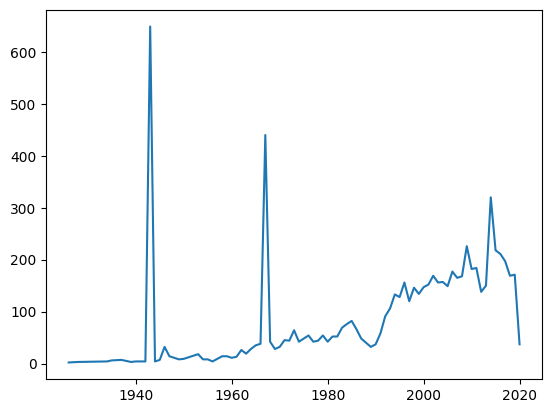

In [57]:
ca_df = df.query("state == 'CA'")
ca_df_b94 = df.query("nteecc == 'B94'")
PTO_overtime = ca_df.groupby("ruleyear")["nteecc"].count()
plt.plot(ca_df.groupby("ruleyear")["nteecc"].count());

In [58]:
pd.options.display.float_format = '{:.2f}'.format
MN_spike = df.query("state == 'MN' & ruleyear == 1945")
assets_descript = MN_spike["assets"].describe()
by_assets = MN_spike.sort_values(by= "assets", ascending=False)#["name"].value_counts()
by_assets["name"].value_counts()

name
PTA MINNESOTA CONGRESS                               41
COTTER SCHOOLS                                        1
MINNEAPOLIS ATHENAEUM                                 1
ALPHA CHI SIGMA FRATERNITY                            1
CLAIRE ANN SHOVER NURSERY SCHOOL INC                  1
NATIONAL INSTITUTE OF GOVERNMENTAL PURCHASING INC     1
CORNELIA ELEMENTARY PTO                               1
TANGLEN ELEMENTARY PARENT TEACHER ORAGANIZATION       1
Name: count, dtype: int64

In [59]:
MN_spike_PTA_CONGRESS = MN_spike.query("name == 'PTA MINNESOTA CONGRESS'")[["name", "ein", "exps", "assets", "totrev"]]
MN_spike_PTA_CONGRESS

,name,ein,exps,assets,totrev
526281,PTA MINNESOTA CONGRESS,411696540,56891.32,51592.46,53372.48
526284,PTA MINNESOTA CONGRESS,411916716,28991.24,25659.07,44357.58
526610,PTA MINNESOTA CONGRESS,113700650,44486.42,81518.84,64716.91
526611,PTA MINNESOTA CONGRESS,205965053,24615.25,37963.19,40482.03
526671,PTA MINNESOTA CONGRESS,411466496,33888.69,43043.82,-780.02
526694,PTA MINNESOTA CONGRESS,411925107,61555.65,78902.72,89312.88
527487,PTA MINNESOTA CONGRESS,411467352,14462.75,51606.49,14359.33
527594,PTA MINNESOTA CONGRESS,416052787,9947.41,21353.20,12002.63
527864,PTA MINNESOTA CONGRESS,411816493,60023.66,45666.96,46243.65
527916,PTA MINNESOTA CONGRESS,411795883,27064.86,23914.99,48128.83


In [60]:
CA_Spike = df.query("state == 'CA' and ruleyear == 1967")
CA_Spike["name"].value_counts()
CA_PTA_Congress = df.query("name == 'PTA CALIFORNIA CONGRESS OF PARENTS TEACHERS & STUDENTS INC' & ruleyear == 1967")
CA_Spike["name"].value_counts()

name
PTA CALIFORNIA CONGRESS OF PARENTS TEACHERS & STUDENTS INC    403
LOS ANGELES BIBLE TRAINING SCHOOL                               1
FRIENDS OF THE PITTSBURG LIBRARY                                1
PTA CALIFORNIA CONGRESS PARENTS TEACHERS & STUDENTS INC         1
THE NUEVA SCHOOL                                                1
FRIENDS OF THE PALO ALTO PUBLIC LIBRARY                         1
SAN MATEO COUNTY COMMUNITY COLLEGES FOUNDATION                  1
FRIENDS OF THE DANVILLE LIBRARY                                 1
LINCOLN SCHOOL PALS CLUB                                        1
THE ORINDA PRESCHOOL INCORPORATED                               1
CONTRA COSTA BOARD OF REALTORS SCHOLARSHIP FOUNDATION           1
DEMOLAY FOUNDATION OF CALIFORNIA INC                            1
PATTEN EDUCATION FOUNDATION                                     1
CONTRA COSTA COLLEGE MEMORIAL SCHOLARSHIP FOUNDATION            1
VILLA MONTESSORI                                                1
EXPLO

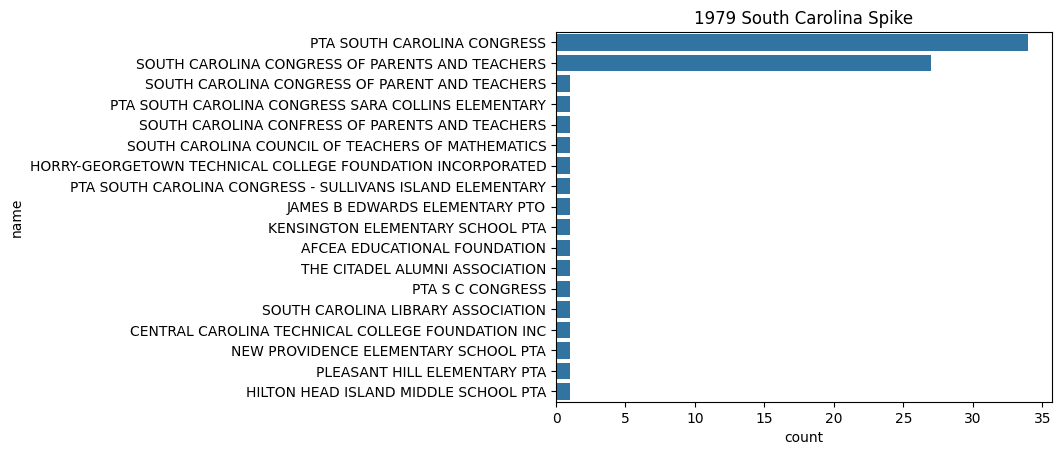

In [61]:
sns.barplot(df.query("state == 'SC' & ruleyear == 1979")["name"].value_counts(), orient='h')
plt.title("1979 South Carolina Spike");

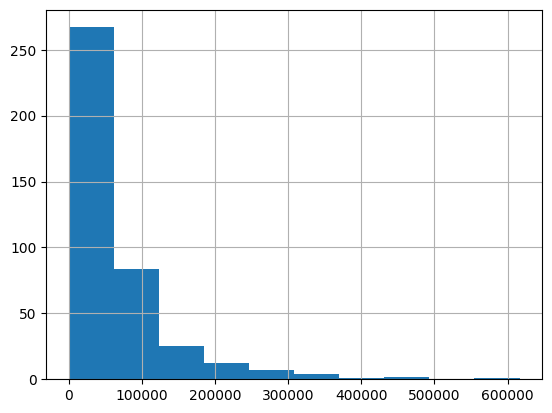

In [62]:
CA_PTA_Congress["assets"].hist();

In [63]:
TX_Spike = df.query("state == 'TX' & ruleyear == 1967")["name"].value_counts()
TX_Spike

name
PTA TEXAS CONGRESS                                        369
PTA TEXAS CONGRESS SUSAN MCMULLIN                           1
JOHN S BRADFIELD SCHOOL PARENT TEACHER ASSOCIATION          1
DALLAS SECONDARY EDUCATIONAL ACADEMY                        1
THE LAMPLIGHTER SCHOOL                                      1
FAIRFIELD LIBRARY ASSOCIATION INC                           1
LONE STAR ELEMENTARY SCHOOL PTA                             1
SOUTH TEXAS COLLEGE OF LAW HOUSTON INC                      1
CISD EDUCATIONAL SUPPORT GROUPS INC                         1
TRINITY EPISCOPAL SCHOOL EXPANSION AND EXCELLENCE FUND      1
BIG THICKET ASSOCIATION                                     1
MATHIS CLUBS AND LIBRARY                                    1
ASSOCIATION OF STATE SUPERVISORS OF MATHEMATICS             1
ANNIE LEE THOMPSON LIBRARY TRUST FUND                       1
FRIENDS OF THE LUBBOCK PUBLIC LIBRARY INC                   1
TEXAS TECH LAW SCHOOL FOUNDATION                            1
Nam

In [64]:
CA_Spike_1943 = df.query("state == 'CA' & ruleyear == 1943")
CA_Spike_1943["name"].value_counts()

name
PTA CALIFORNIA CONGRESS OF PARENTS TEACHERS & STUDENTS INC      599
PTA CALIFORNIA CONGRESS OF PARENTS TEACHERS AND STUDENTS INC     28
PTA CALIFORNIA CONGRESS OF PARENTS TEACHERS & STUDENTS            6
PTA CALIFORNIA CONGRESS OF PARENTSTEACHERS AND STUDENTS INC       3
SAMUEL A FRYER YAVNEH ACADEMY                                     1
PTA CALIFRONIA CONGRESS OF PARENTS TEACHERS & STUDENTS INC        1
CASTILLEJA SCHOOL FOUNDATION                                      1
SUNSET NURSERY SCHOOL                                             1
PTA CALIFORNIA CONGRASS OF PARENTS TEACHERS & STUDENTS INC        1
PTA CALIFORNIA CONGRESS OF PARENTS TEACHERS AND STUDENTS          1
FRANCIS PARKER SCHOOL                                             1
PTA CALIFORNIA CONGRESS OF PARENTSTEACHERS AND STUDENTS           1
PTA CALIFORNIA CONTRESS OF PARENTS TEACHERS & STUDENTS INC        1
ALLEN ELEMENTARY SCHOOL PARENTS TEACHERS CLUB INC                 1
PTA CALIFORNIA CONGRESS OF PARENTS STUDENTS

In [65]:
PA_spike = df.query("state == 'NY' & ruleyear == 2014")
PA_spike["name"].value_counts()

name
INTERNATIONAL CONSORTIUM OF MINORITY CYBERSECURITY PROFESSIONA          1
ZMI FOUNDATION INC                                                      1
NEW AMERICAN ACADEMY CHARTER SCHOOL                                     1
THE CO-OP SCHOOL                                                        1
PARENT TEACHER ASSOCIATION OF P S 84 THE JOSE DE DIEGO SCHOOL INC       1
                                                                       ..
ROGER L ABLE FOUNDATION INC                                             1
THE PARENT TEACHER ASSOCIATION OF THE HIGH SCHOOL OF AMERICAN STUDIE    1
WESTCHESTER BRASSMEN SCHOLARSHIP FUND INC                               1
CRP EDUCATIONAL MEDIA FUND INC                                          1
BETTER CITIES & TOWNS INC                                               1
Name: count, Length: 184, dtype: int64

In [66]:
df.query("ruleyear == 2014")["nteecc"].value_counts()

nteecc
B11     318
B99     254
B94     241
B82     238
B20     178
B29     170
B90     149
B112     90
B25      84
B21      69
B12      62
B70      60
B24      56
B03      55
B84      53
B19      43
B80      36
B117     34
B01      33
B60      31
B43      25
B28      25
B83      20
B42      19
B30      17
B02      15
B05      15
B92      12
B50      10
B40       8
B012      6
B41       4
B122      4
B118      3
B128      3
B032      3
B039      3
B129      2
B804      1
B123      1
B115      1
B038      1
B9        1
B033      1
B022      1
B017      1
B119      1
Name: count, dtype: int64

In [67]:
df.query("state == 'GA' & ruleyear == 1963")["name"].value_counts()

name
PTA GEORGIA CONGRESS                                       133
CREEK VIEW ELEMENTARY SCHOOL PTA                             1
GEORGIA STATE UNIVERSITY ATHLETIC ASSOCIATION INC            1
GEORGIA STATE UNIVERSITY RISK MANAGEMENT FOUNDATION INC      1
GEORGIA SOUTHERN UNIVERSITY FOUNDATION INC                   1
NORTHWEST GEORGIA REGIONAL LIBRARY                           1
STRATFORD ACADEMY INC                                        1
Name: count, dtype: int64